<a href="https://colab.research.google.com/github/JoungMinJu/machine_learning/blob/main/7%EC%9E%A5/%EC%8B%AC%EC%B8%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
(train_input, train_target),(test_input, test_target)=keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
from sklearn.model_selection import train_test_split
train_scaled=train_input/255.0
train_scaled=train_scaled.reshape(-1,28*28)
train_scaled, val_scaled, train_target, val_target=train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [4]:
#인공신경망 모델에 층을 2개 추가할 것임.
#첫 번쨰 이미지를 펼친 배열
#784개의 뉴런을 가진 입력층
#100개의 뉴런을 가진 은닉층
#10개의 뉴런을 가진 출력층


#입력층과 출력층 사이에 추가된 밀집층을 은닉층이라 부른다.
#은닉층에는 활성화 함수가 표시되어있다. 활성화 함수는 신경망 층의 선형방정식의 계산 값에 적용하는 함수이다. 
#이전 절에서 출력층에 적용했던 소프트맥스 함수도 활성화 함수이다. 
#은닉층의 활성화 함수는 비교적 자유로운 것이 특징. 대표적으로 시그모이드함수와 렐루 함수 등을 사용한다.

In [5]:
#회귀를 위한 신경망의 출력층에는 임의의 어떤 숫자가 출력되므로 활성화 함수를 적용할 필요 없음
#분류문제는 확률을 출력하기 위해 활성화 함수를 사용하는 것 뿐

In [ ]:
#은닉층에 왜 활성화 함수를 적용하는가??은닉층에서 선형적인 산술계산만 수행한다면 수행역할이 없는셈 ㅠㅠ 대입해서 합쳐질 수 있는 것이니
#선형계산을 적당하게 비선형적으로 비틀어주어야한다는 것. 그래야 다음 층의 계산과 단순히 합쳐지지 않고 나름의 역할을 할 수 있는 것.



In [6]:
dense1=keras.layers.Dense(100,activation='sigmoid',input_shape=(784,))
dense2=keras.layers.Dense(10, activation='softmax')

In [7]:
#심층신경망 만들기
model=keras.Sequential([dense1, dense2])

In [8]:
#모델 정보
model.summary()


#맨 첫줄에 모델의 이름, 그리고 층이 순서대로 나온다.
#층마다 층이름, 클랫, 출력 크기, 모델 파라미터 개수가 출력된다. 
#층 만들때 name 매개변수로 이름을 지정할 수 있다

#none,100인 이유는? 첫번째는샘플의 개수를 나타내는데 아직 샘플 개수가 정의되어있지 않아서 none이 된다.
#케라스 모델의 fit()메서드에 훈련데이터 주입하면 이거 그대로 한 번에 사용하지 않고 조금씩 나눠서 여러번에 걸쳐 경사하강법 단계를 수행한다. !! 미니배치 경사 하강법을 수행하는 것

#케라스의 기본 미니배치 크기는 32개입니다. 이 값은fit()메서드에서 batch_size ㅂ매개변수로 바꿀 수 있따. 따라서 샘플 개수를 고정하지 않고 어떤 배치 크기에도 유연하게 대응할 수 있도록 none으로 설정한다.


#마지막 줄에는 모델 파라미터 개수가 출력된다. 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


층을 추가하는 다른 방법


In [14]:
model=keras.Sequential([keras.layers.Dense(100,activation='sigmoid', input_shape=(784,),name='hidden'), keras.layers.Dense(10,activation='softmax', name='output')], name='패션 mnist 모델')

In [15]:
#Sequential 클래스 생성자 안에서 바로 Dense객체를 생성했음
#이렇게 되면 추가되는 층을 한 눈에 쉽게 알아볼 수 있음


model.summary()

Model: "패션 mnist 모델"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [16]:
#근데 길어질 수도 있잖아 그래서 가장 많이 사용하는 것이 add()

model=keras.Sequential()
model.add(keras.layers.Dense(100,activation='sigmoid', input_shape=(784,),name='hidden'))
model.add(keras.layers.Dense(10,activation='softmax', name='output'))


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [19]:
 model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
 model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5631 - accuracy: 0.8075
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4099 - accuracy: 0.8516
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3755 - accuracy: 0.8634
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3528 - accuracy: 0.8717
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3346 - accuracy: 0.8791


렐루 함수! !

식모이드 함수는 오른쪽과 왼쪽끝으로 갈 수록 그래프가 주워있어서 올바른 출력을 만드는데 신속하게 대응하지 못한다ㅠ
특히 층이 많은 심층 신경망일수록 그 효과가 누적되어 학습을 어렵게 만든다. 이를개선하기 위해 다른 종류의 활성화 함수가 제안되었음. 바로 레루 함수!

렐루함수는 입력이 양수일 경우 마치 활성화 함수가 없는 것 처럼 입력을 토과시키고 음수일 경우에는 0으로 만드는 심층신경망에 유용한 함수이다. 

max(0,z)처럼 쓸 수 있다. 이 함수는 z가 0보다 크면 z를 출력하고 아니면 0을 출력한다. 렐루함수느 ㄴ특히 이미지 처리에서 좋은 성능을 낸다고 알려져있다. 

In [20]:
#reshape말고 Flatten 층을 사용하여 1차원으로 피는 방법 소개
#Flatten클래스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 한다. 입력에 곱해지는 가중치나 절편이 없음
#하지만 걍 추가는 하기때문에.. 층이라 부른다. 결과엔 영향 없음 
#입력층 바로 뒤에 추가한다!

In [21]:
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [22]:
model.summary()

#flatten때문에 입력값의 차원을 짐작할 수 있게 된다.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [23]:
(train_input, train_target), (test_input, test_target)=keras.datasets.fashion_mnist.load_data()
train_scaled=train_input/255.0
train_scaled, val_scaled, train_target, val_target=train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [24]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5283 - accuracy: 0.8129
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3910 - accuracy: 0.8605
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3553 - accuracy: 0.8716
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3346 - accuracy: 0.8810
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3199 - accuracy: 0.8864


In [25]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3748 - accuracy: 0.8740


[0.3747553825378418, 0.8740000128746033]

옵티마이저

은닉층의 뉴런 개수도 하이퍼 파라미터이다. 
활성화 함수도 하이퍼파라미터임
층의 종류도 하이퍼파라미터

케라스는 기본적으로 미니배치 경사 하강법을 사용하며 미니배치의 개수는 32개이다. fit()메서드의 batch_size 매개변수에서 이를 조정할 ㅜㅅ 있으며 역시 하이퍼파라미터이다.
fit()의 epochs도 하이퍼파라미터!

compile()에서는 기본경사하가업인 RMSprop를 사용했다. 
근데 케라스는 다양한 종류의 경사하강법알고리즘을 제공한다. 이들을 옵티마이저라고 부른다. 
또한 RSMprop의 학습률 또한 조정할 하이퍼파라미터이다.


이후로는 여러가지 옵티마이저를 테스트해볼 것.
가장 기본적인 옵티마이저는 SGD임(확률적 경사하강법) 이름은 SGD이지만 1개의 샘플을 뽑아서 훈련하지 않고 기본적으로 미니배치를 사용한다.


model.compile(optimizer='sgd', loss='sparse_categorical_corssentropy', metrics='accuracy')

케라스 옵티마이저 패키지 안에 SGD 클래스로 구현되어있다아아아

SGD 기본 학습률이 0.01일때 바꾸고싶으면 learning_rate로 지정해 사용하면 된다.
sgd=keras.optimizers.SGD(learning_rate=0.1)



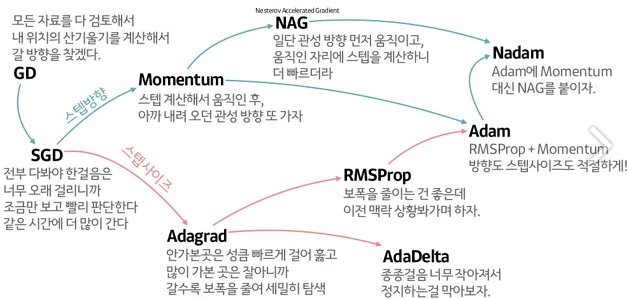keras.layers.Dense(10,activation='softmax', name='output')

기본경사 하강법 옵티마이인 SGD, 모멘텀, 네스테로프모멘텀은 모두 SGD클래스에서 제공한다. SGD클래스의 모멘텀 매개변수의 기본값은 0이앋. 이를 0보다 큰 값으로 지정하면 마치 이전의 그레이디언트를 가속도처럼 사용하는 모멘텀 최적화를 사용한다. 보통 모멘텀 매개변수는 0.9 이상을 지정한다.

SD클래스의 nesterov 매개변수를 기본값 False에서 True로 지정하면 네스테로프 모멘텀 최적화를 사용하낟.

sgd=keras.optimizers.SGD(momentum=0.9, nesterov=True)
네스테로프 모멘텀은 모멘텀 최적화를 2번 반복하여 구현한다. 대부부느이 경우 네스테로프 모멘텀 최적화가 기본 확률적 경사 하강법보다 더 나은 성능ㄹ을 제공한다.

모멘텀이 최적점에 가까이 갈수록 학습률을 낮출 수 있다. 이렇게 하면 안정적으로 최적점에 수렴할 간으성이 높다. 이런 학습률을 적응적 학습률이라한다. 이런 방식들은 학습률 매개변수를 튜닝하는 수고를 덜 수 있는 것이 장점이다.

적응적 학습률을 사용하는 대표적 옵티마이저는 Adagrad와 RMSprop이다. 각각 complie() 메소드의 optimizer 매개변수에 adagrad 와  rmsprop로 지정할 수 있다. optimizer 매개변수의 기본값이 바로 rmsprop이다. 
바꾸고 싶다면?

adagrad=keras.optimizer.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy',metrics='accuracy')

rmsprop=keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

모멘텀 최적화와 RSMprop의 장점을 접목한 것이 Adam임. Adam은 RMSprop과 함께 맨 청므 시도해 볼수 있는 좋은 알고리즘이다!!!!!!!!!!!!!!!! 앞서 말한 세개의 클래스는 learning_rate매개변수의 기본값으로 모두 0.001을 사용한다.


>> 핸드온 머신러닝 11장에서 정확한 옵티마이저들의 상세 이론을 살펴볼 수 있다.


In [26]:
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5245 - accuracy: 0.8156
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3942 - accuracy: 0.8588
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3509 - accuracy: 0.8732
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3249 - accuracy: 0.8812
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3074 - accuracy: 0.8872


In [28]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3310 - accuracy: 0.8792


[0.33104845881462097, 0.8792499899864197]